In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlb-pitch-data-20152018/pitches.csv
/kaggle/input/mlb-pitch-data-20152018/atbats.csv
/kaggle/input/mlb-pitch-data-20152018/games.csv
/kaggle/input/mlb-pitch-data-20152018/2019_games.csv
/kaggle/input/mlb-pitch-data-20152018/2019_atbats.csv
/kaggle/input/mlb-pitch-data-20152018/2019_pitches.csv
/kaggle/input/mlb-pitch-data-20152018/player_names.csv
/kaggle/input/mlb-pitch-data-20152018/ejections.csv


In [2]:
import seaborn as sns

In [3]:
data_raw = pd.read_csv('/kaggle/input/mlb-pitch-data-20152018/pitches.csv')
# Print out size, shape, and column names
print("size: " + str(data_raw.size))
print("shape: " + str(data_raw.shape))
print("columns: " + str(data_raw.columns))

size: 114686160
shape: (2867154, 40)
columns: Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [4]:
df = data_raw
# dropping useless columns and rows with null values
df = df.drop(["zone", "type_confidence", "pitch_type", "ab_id", "event_num"], axis = 1)
df = df.dropna()
# drop everything except swinging strikes and foul balls
df = df[df.code.isin(['S', 'F'])]
# only 2-strike counts
df = df[df.s_count == 2]
df = df[df.b_count == 3]
print(df.shape)

(55282, 35)


In [5]:
print(df.shape)
df = df.drop(["y0", "type", "b_score", "outs", "pitch_num", "b_count", "s_count", "on_1b", "on_2b", "on_3b"], axis = 1)

(55282, 35)


In [6]:
print(df.columns)

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'z0', 'pfx_x', 'pfx_z',
       'nasty', 'code'],
      dtype='object')


In [7]:
# balance out the cases
strikes = df[df.code == 'S']
fouls = df[df.code == 'F']
fouls = fouls[0:len(strikes)]
tojoin = [strikes, fouls]
df = pd.concat(tojoin)
print(strikes.shape)
df.shape

(15199, 25)


(30398, 25)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as tts

In [9]:
print(df.columns)

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'z0', 'pfx_x', 'pfx_z',
       'nasty', 'code'],
      dtype='object')


In [10]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
px_encoded = le.fit_transform(df.px)
pz_encoded= le.fit_transform(df.pz)
start_encoded=le.fit_transform(df.start_speed)
end_encoded=le.fit_transform(df.end_speed)
spin_encoded=le.fit_transform(df.spin_rate)
spin_dir_encoded=le.fit_transform(df.spin_dir)
break_encoded=le.fit_transform(df.break_angle)
break_length_encoded=le.fit_transform(df.break_length)
break_y_encoded=le.fit_transform(df.break_y)
ax_encoded=le.fit_transform(df.ax)
ay_encoded=le.fit_transform(df.ay)
az_encoded=le.fit_transform(df.az)
sz_bot_encoded=le.fit_transform(df.sz_bot)
sz_top_encoded=le.fit_transform(df.sz_top)
vx0_encoded=le.fit_transform(df.vx0)
vy0_encoded=le.fit_transform(df.vy0)
vz0_encoded=le.fit_transform(df.vz0)
x_encoded=le.fit_transform(df.x)
x0_encoded=le.fit_transform(df.x0)
y_encoded=le.fit_transform(df.y)
z0_encoded=le.fit_transform(df.z0)
pfx_x_encoded=le.fit_transform(df.pfx_x)
pfx_z_encoded=le.fit_transform(df.pfx_z)
nasty_encoded = le.fit_transform(df.nasty)

features = np.array(list(zip(px_encoded,pz_encoded,start_encoded,end_encoded, spin_encoded,spin_dir_encoded,break_encoded,
              break_length_encoded,break_y_encoded,ax_encoded,ay_encoded,az_encoded,sz_bot_encoded,
              sz_top_encoded,vx0_encoded,vz0_encoded,x_encoded,x0_encoded,y_encoded, z0_encoded,
              pfx_x_encoded,pfx_z_encoded, nasty_encoded)))
code_encoded = le.fit_transform(df.code) #S = 1, F = 0
print(code_encoded)
print(len(features[0]))

[1 1 1 ... 0 0 0]
23


In [11]:
#df.transpose()[:23].transpose()
features_train, features_test, label_train,label_test = tts.train_test_split(features, code_encoded, test_size = 0.1, random_state = 69)
features_train_2, features_test_2, label_train_2,label_test_2 = tts.train_test_split(df.transpose()[:25].transpose(), code_encoded, test_size = 0.1, random_state = 69)

In [12]:
features_train = np.array(features_train)
labels_train = np.array(label_train)
features_test = np.array(features_test)
labels_test = np.array(label_test)

features_train_2 = np.array(features_train_2)
labels_train_2 = np.array(label_train_2)
features_test_2 = np.array(features_test_2)
labels_test_2 = np.array(label_test_2)

In [13]:
print(features_train.shape)
print(features_train_2.shape)

(27358, 23)
(27358, 25)


In [14]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features_train, labels_train)

GaussianNB()

In [15]:
predictions = model.predict(features_test)


In [19]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(labels_test, predictions))
print("ROC-AUC: ",metrics.roc_auc_score(labels_test, predictions))

Accuracy: 0.6207236842105263
ROC-AUC:  0.6206410516661466


In [ ]:
print(labels_train.shape)
print(labels_train_2.shape[0])
print(features_train_2.shape[1])

In [17]:
from sklearn.metrics import confusion_matrix as cm

cm(labels_test,predictions)

# 1009 true negatives
# 514 false positives
# 639 false negatives
# 878 true positives

array([[1009,  514],
       [ 639,  878]])

In [31]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

In [50]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    

    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

#     print(train_scores)
#     print(test_scores)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

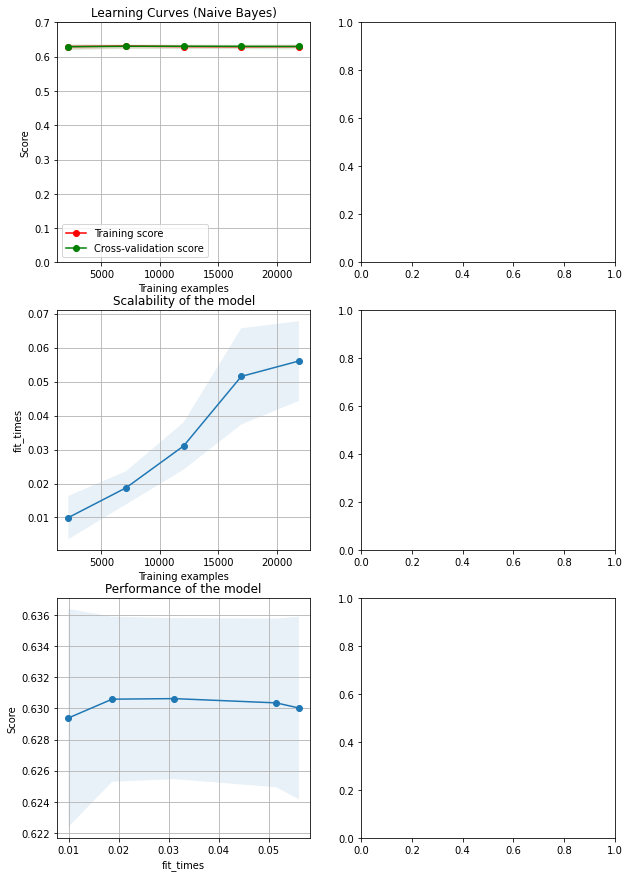

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model, title, features_train, labels_train, axes=axes[:, 0], ylim=(0, .7),cv=cv, n_jobs=4)
plt.show()

In [22]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [26]:
t_model = models.Sequential()
t_model.add(layers.Dense(10000, activation="relu", input_shape=(features_train.shape)))
t_model.add(layers.Dropout(0.40))
t_model.add(layers.Dense(5000, activation="relu"))
t_model.add(layers.Dropout(0.25))
t_model.add(layers.Dense(2500, activation="relu"))
t_model.add(layers.Dropout(0.1))
t_model.add(layers.Dense(1250, activation="relu"))
t_model.add(layers.Dropout(0.1))
t_model.add(layers.Dense(625, activation="relu"))
t_model.add(layers.Dropout(0.1))
t_model.add(layers.Dense(313, activation="relu"))
t_model.add(layers.Dropout(0.1))
t_model.add(layers.Dense(labels_train.shape[0]))
t_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.001),
    metrics=['acc',tf.keras.metrics.AUC()])

In [27]:
history=t_model.fit(features_train, labels_train,epochs=1000,batch_size=128,validation_data=(features_test,labels_test))
test_loss, test_acc = t_model.evaluate(features_test,labels_test)

Epoch 1/1000


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:408 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/utils/metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:2091 update_state  **
        label_weights=label_weights)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/utils/metrics_utils.py:354 update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 27358) and (None, 1) are incompatible


In [20]:
from sklearn.neural_network import MLPRegressor
fear = MLPRegressor(random_state=1, max_iter=100).fit(features_train, labels_train)
fear.score(features_test, labels_test)

-1457.2111366569568

In [ ]:
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(features_train,labels_train)

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(features_train,labels_train)
plt.plot(features_test,polyreg.predict(features_test),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [ ]:
# convert pitch outcomes to numbers so they can be plotted
# higher number = better outcome
# outcomes = {'S': 1, 'C': 1, 'W': 1, 'T': 0.75, 'F': 0.5, 'X': 0.25, 'D': 0, 'E': 0 }
# df['code_num'] = df['code'].map(outcomes)
# df = df.drop(['code'], axis = 1) 
sns.displot(df.code_num)